# 🧼 Limpieza y Análisis Exploratorio de Datos (EDA) - Dataset de Diabetes

## 📌 Objetivo del análisis

En este análisis exploratorio trabajaremos con un dataset real de salud, que contiene información médica de pacientes pertenecientes a la comunidad Pima (EE.UU.), con el objetivo de estudiar las variables asociadas al diagnóstico de **diabetes tipo 2**.

El propósito es realizar una limpieza completa de los datos, analizar las relaciones entre variables y detectar patrones relevantes que puedan servir como base para futuros modelos predictivos.

---

## 🩺 Descripción del dataset

El conjunto de datos incluye las siguientes variables:

- **Pregnancies**: Número de embarazos
- **Glucose**: Concentración de glucosa en plasma a 2 horas
- **BloodPressure**: Presión arterial diastólica (mm Hg)
- **SkinThickness**: Espesor del pliegue cutáneo del tríceps (mm)
- **Insulin**: Nivel de insulina en sangre (mu U/ml)
- **BMI**: Índice de masa corporal (peso en kg / altura en m²)
- **DiabetesPedigreeFunction**: Función de antecedentes familiares de diabetes
- **Age**: Edad (en años)
- **Outcome**: Variable objetivo (1 = diabetes, 0 = no diabetes)

---

## 🧪 Metodología aplicada

El proceso de trabajo seguirá estas etapas:

1. Revisión inicial del dataset
2. Análisis de valores faltantes y datos atípicos
3. Conversión de tipos y formato adecuado
4. Análisis estadístico univariado y multivariado
5. Visualización de la distribución de variables
6. Análisis de correlación
7. Conclusiones preliminares

Cada decisión tomada durante la limpieza será argumentada, priorizando la calidad del análisis y la preparación del dataset para su uso en modelos de Machine Learning en etapas posteriores.

---

## 📂 Fuente del dataset

- UCI Machine Learning Repository / Kaggle: [https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

---

*Autor: Natalia Noemí Liscio | Proyecto de portafolio - Ciencia de Datos | 2025*

---
---
---
---


In [1]:
#Cargamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan


In [2]:
#cargamos el dataset
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Revisión general de la estructura del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)
print("\nInformación del dataset:")
print(df.info())

Dimensiones del dataset (filas, columnas): (768, 9)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Primeras filas para visualizar el contenido
display(df.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Información general sobre las columnas, tipos de datos y nulos
print("\nInformación general del dataset:")
df.info()



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
display(df.describe())



Estadísticas descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Detección de duplicados
duplicados = df.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")



Cantidad de filas duplicadas: 0


In [9]:
# Columnas que NO deberían tener valores cero
columnas_invalidas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("Recuento de valores 0 en columnas donde no debería haber:")
for columna in columnas_invalidas:
    cantidad = (df[columna] == 0).sum()
    porcentaje = cantidad / len(df) * 100
    print(f"{columna}: {cantidad} valores ( {porcentaje:.2f}% )")


Recuento de valores 0 en columnas donde no debería haber:
Glucose: 5 valores ( 0.65% )
BloodPressure: 35 valores ( 4.56% )
SkinThickness: 227 valores ( 29.56% )
Insulin: 374 valores ( 48.70% )
BMI: 11 valores ( 1.43% )


In [10]:
# Columnas donde los ceros deben ser considerados valores faltantes
columnas_invalidas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Reemplazo de ceros por NaN
df[columnas_invalidas] = df[columnas_invalidas].replace(0, np.nan)

# Verificamos nuevamente la cantidad de valores nulos por columna
print("Valores nulos tras el reemplazo de ceros:")
print(df.isnull().sum())


Valores nulos tras el reemplazo de ceros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## 🧽 Tratamiento de valores faltantes

Durante la revisión inicial del dataset, se detectó que algunas columnas contenían valores cero que no tienen sentido desde el punto de vista médico (por ejemplo, una persona con 0 de glucosa o 0 de índice de masa corporal). Estos valores fueron tratados como **valores faltantes** (`NaN`).

Las columnas afectadas fueron:

- **Glucose**
- **BloodPressure**
- **SkinThickness**
- **Insulin**
- **BMI**

### 🔧 Estrategia aplicada:

- Para las columnas **SkinThickness** (227 nulos) e **Insulin** (374 nulos), se optó por **imputar la mediana**, ya que eliminar esas filas habría implicado una pérdida significativa de datos.
- Para **Glucose**, **BloodPressure** y **BMI**, donde los valores nulos eran escasos, se **eliminaron las filas** que los contenían. Esta decisión preserva la integridad del dataset sin afectar de forma relevante el análisis posterior.

> ⚖️ Se priorizó un equilibrio entre conservar datos valiosos y asegurar la calidad del dataset, aplicando una estrategia mixta de imputación y eliminación.



In [12]:
# Imputamos correctamente sin usar chained assignment
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

# Eliminamos filas con nulos restantes (Glucose, BloodPressure y BMI)
df = df.dropna()

# Verificamos nuevamente los nulos
print("Valores nulos tras imputación y eliminación:")
print(df.isnull().sum())

# Mostramos dimensiones finales
print(f"\nDimensiones del dataset después de la limpieza: {df.shape}")


Valores nulos tras imputación y eliminación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dimensiones del dataset después de la limpieza: (724, 9)


## 📉 Análisis de valores atípicos (Outliers)

El análisis de outliers es una parte esencial del preprocesamiento, ya que estos valores extremos pueden distorsionar estadísticas y modelos predictivos.

Se aplicaron dos enfoques:

1. **Análisis visual mediante gráficos de caja (boxplots)**: Permiten identificar rápidamente variables con valores extremos.
2. **Método numérico utilizando el rango intercuartil (IQR)**: Se calculó la cantidad de outliers por columna considerando los límites Q1 - 1.5*IQR y Q3 + 1.5*IQR.

### 🎯 Decisión tomada:

En esta etapa, los outliers **no serán eliminados automáticamente**, ya que podrían corresponder a casos reales relevantes (por ejemplo, personas con niveles de glucosa muy altos o insulinorresistencia severa). Sin embargo, quedan documentados para ser considerados en futuros modelos.

> Esta elección responde a una estrategia conservadora: **preservar la información clínica**, a menos que el análisis posterior justifique su remoción.


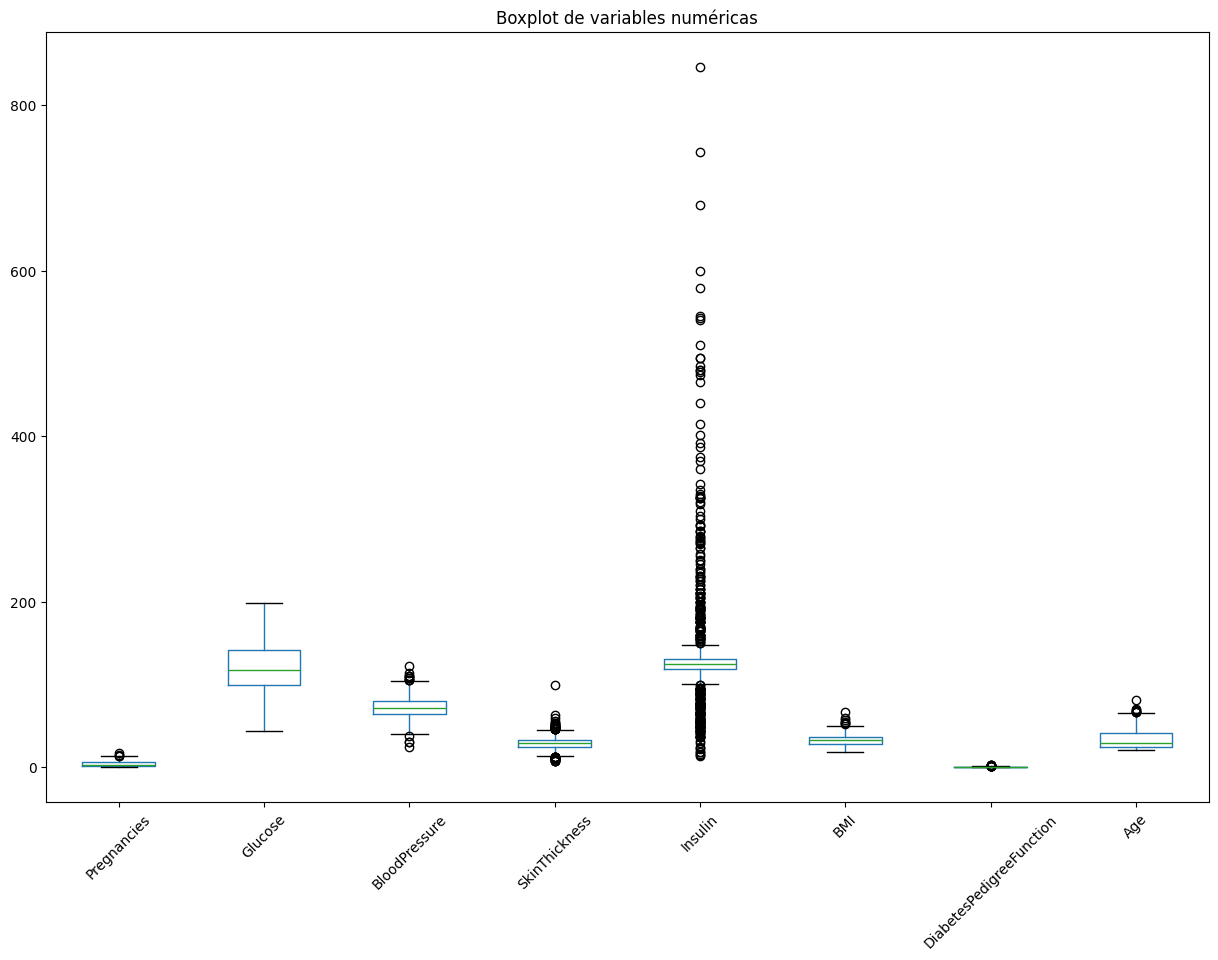

In [16]:
# Definimos columnas numéricas de forma correcta (sin incluir 'Outcome')
columnas_numericas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Tamaño del gráfico
plt.figure(figsize=(15, 10))

# Gráfico de boxplots
df.boxplot(column=columnas_numericas, grid=False)

plt.title("Boxplot de variables numéricas")
plt.xticks(rotation=45)
plt.show()


In [14]:
# Función para detectar outliers usando el método IQR
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

# Contamos outliers por columna
columnas_numericas = df.columns[:-1]  # Excluimos 'Outcome'
print("Cantidad de outliers detectados por IQR:")
for col in columnas_numericas:
    outliers = detectar_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)}")


Cantidad de outliers detectados por IQR:
Pregnancies: 4
Glucose: 0
BloodPressure: 14
SkinThickness: 53
Insulin: 297
BMI: 7
DiabetesPedigreeFunction: 28
Age: 7


## 📊 Distribución de variables numéricas

Se realizó un análisis de distribución para cada variable numérica utilizando **histogramas combinados con curvas de densidad (KDE)**.

Esto permite observar:

- La **forma de la distribución** (asimetría, sesgo).
- Presencia de **modas múltiples**.
- Variables que **requieren transformación** (por ejemplo, Insulin con fuerte sesgo a la derecha).
- Posibles agrupamientos naturales en algunas variables (ej: Age o Glucose).

Este paso es clave para entender cómo se comportan los datos y decidir si es necesario aplicar normalización, escalado o transformaciones (como logarítmica o Box-Cox) en fases posteriores.


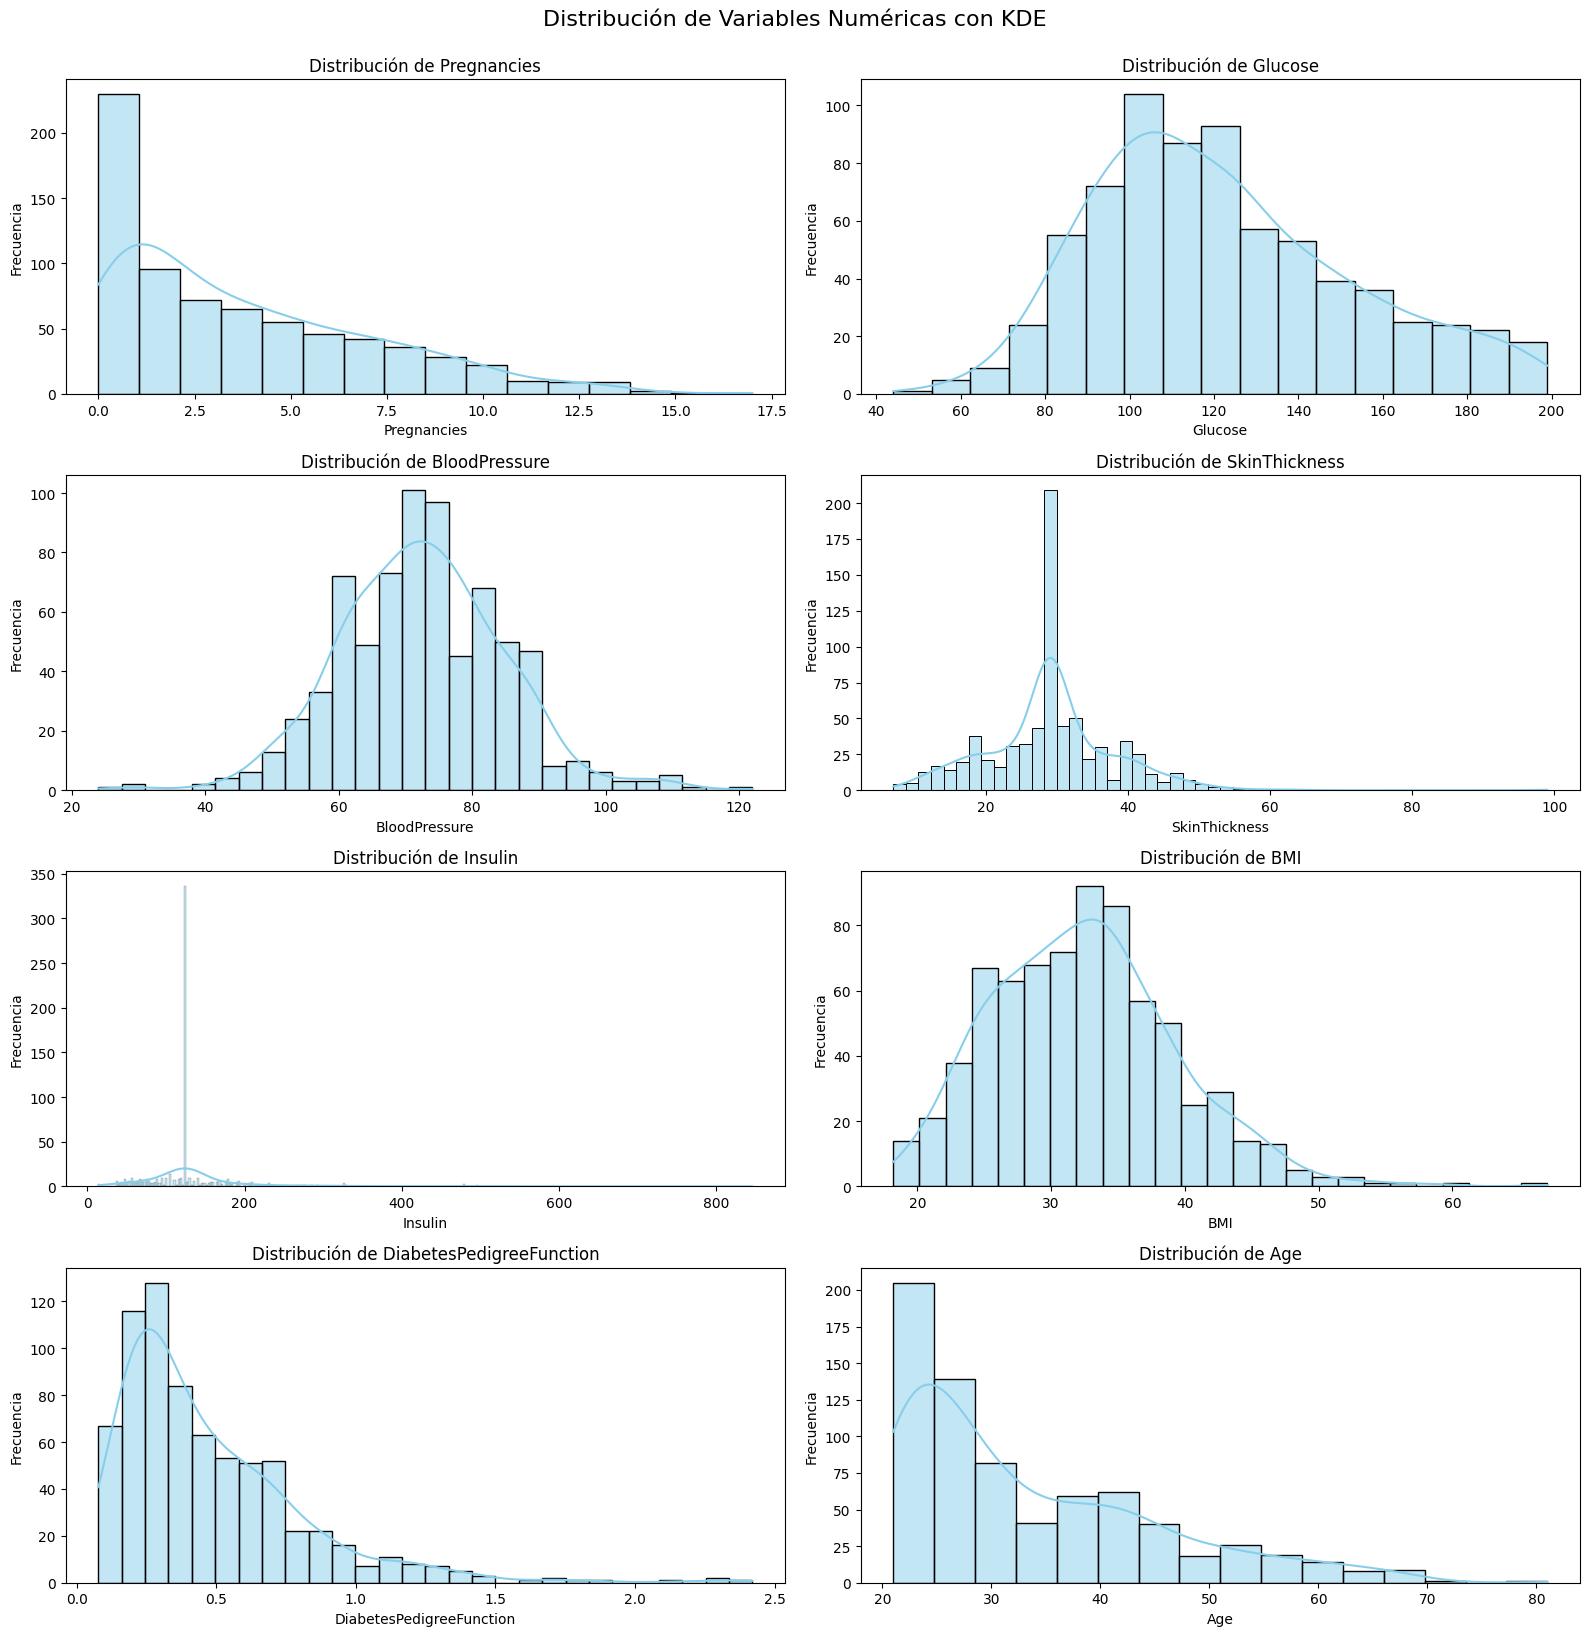

In [17]:
# Lista de columnas numéricas sin la variable objetivo
columnas_numericas = df.columns.drop('Outcome').tolist()

# Gráfico de distribución por variable (histograma + KDE)
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos subplots para todas las variables
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
axs = axs.flatten()

for i, col in enumerate(columnas_numericas):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i], color="skyblue", edgecolor="black")
    axs[i].set_title(f'Distribución de {col}', fontsize=12)
    axs[i].set_ylabel("Frecuencia")
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.suptitle("Distribución de Variables Numéricas con KDE", fontsize=16, y=1.02)
plt.show()


## 🔗 Matriz de correlación

La matriz de correlación permite identificar relaciones lineales entre variables. A continuación, se destacan algunas observaciones relevantes:

- Existe una **alta correlación positiva** entre `Glucose` y el diagnóstico de diabetes (`Outcome`), lo cual es esperable clínicamente.
- `BMI`, `Age` y `DiabetesPedigreeFunction` también muestran correlaciones positivas moderadas con la variable objetivo.
- Algunas variables tienen **baja o nula correlación** entre sí, lo cual reduce el riesgo de multicolinealidad.

Esta información es útil tanto para el análisis como para la futura selección de variables en modelos predictivos.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


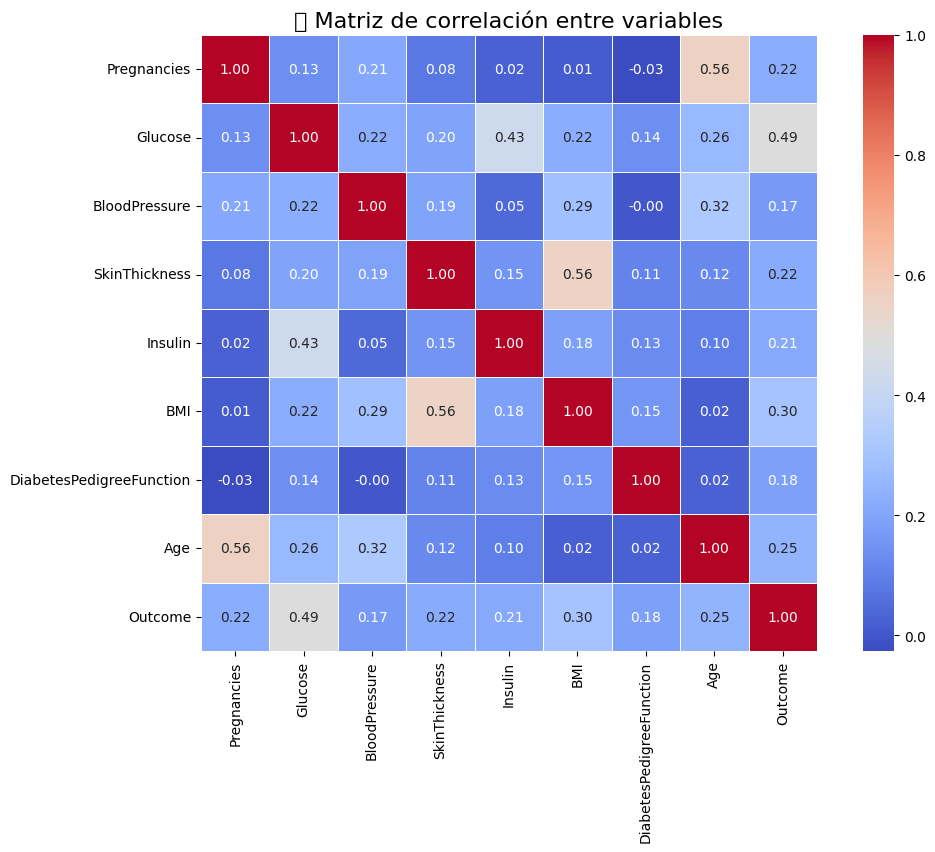

In [18]:
# Calculamos la matriz de correlación
correlaciones = df.corr()

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Heatmap con anotaciones
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("🔗 Matriz de correlación entre variables", fontsize=16)
plt.show()


## 🩺 Análisis de variables según diagnóstico de diabetes

Para comprender mejor las diferencias entre personas con y sin diagnóstico de diabetes, se compararon las variables numéricas agrupadas por la variable `Outcome`.

### Observaciones clave:

- Las personas con diabetes presentan niveles claramente más altos de **glucosa** y **BMI**.
- También se observan diferencias en **edad**, **función de antecedentes familiares (DiabetesPedigreeFunction)** y **insulina**.
- Variables como `BloodPressure` y `SkinThickness` muestran diferencias menos marcadas, pero igualmente relevantes.

Este tipo de análisis es fundamental para entender qué factores podrían ser predictivos del diagnóstico y cómo se comporta cada variable según la clase objetivo.


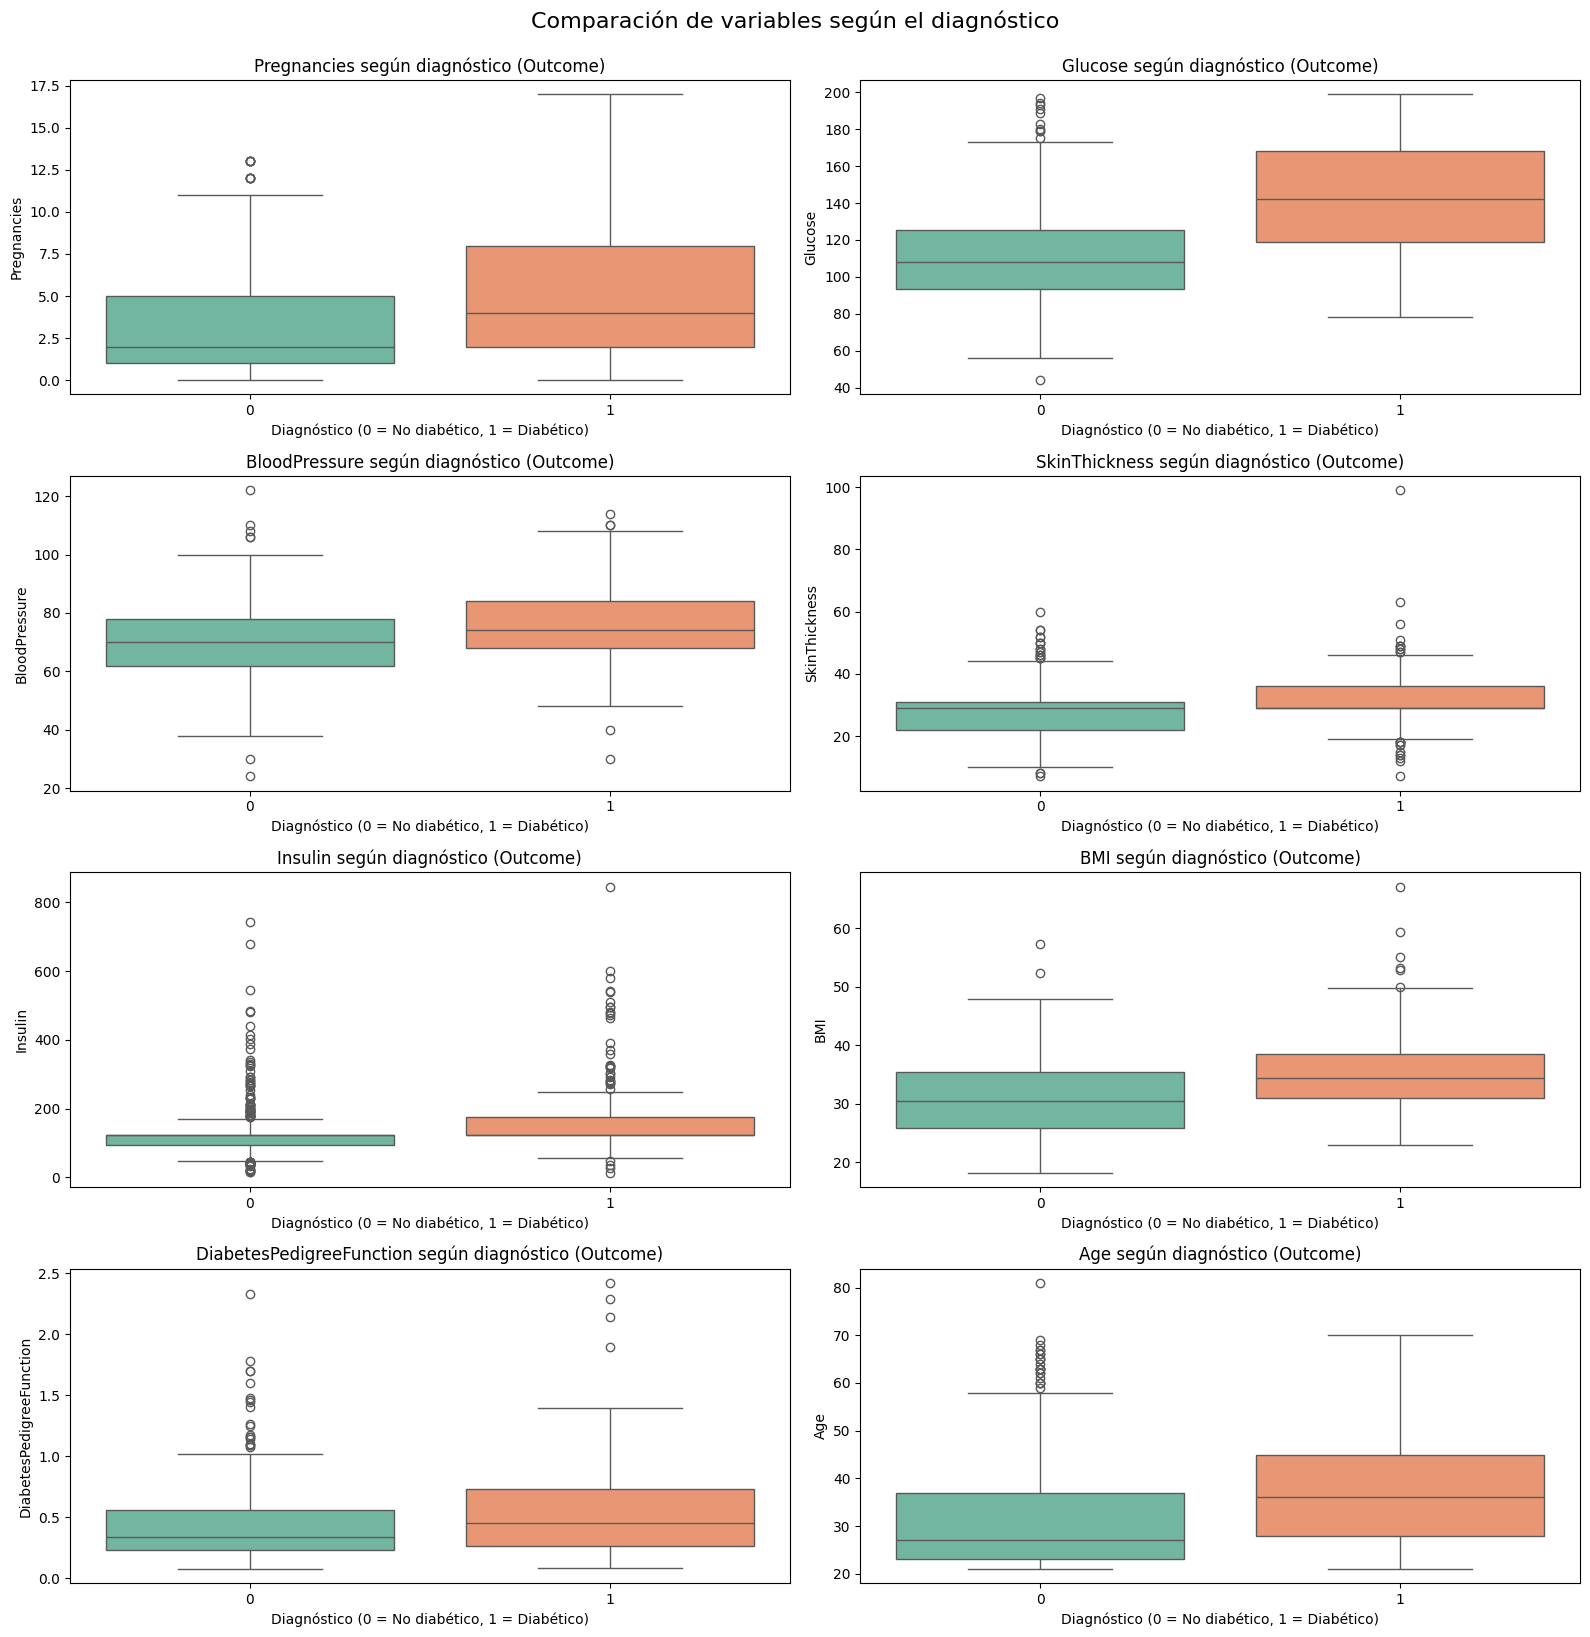

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
axs = axs.flatten()

for i, col in enumerate(columnas_numericas):
    sns.boxplot(
        data=df, x="Outcome", y=col,
        hue="Outcome", palette="Set2",
        ax=axs[i], legend=False
    )
    axs[i].set_title(f'{col} según diagnóstico (Outcome)')
    axs[i].set_xlabel("Diagnóstico (0 = No diabético, 1 = Diabético)")
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle("Comparación de variables según el diagnóstico", fontsize=16, y=1.02)
plt.show()


# ✅ Conclusiones del Análisis Exploratorio de Datos (EDA)

Tras realizar una limpieza exhaustiva y un análisis exploratorio completo del dataset de diabetes, se destacan las siguientes conclusiones clave:

---

## 🧼 Limpieza de datos

- Se detectaron valores **cero anómalos** en columnas clínicas como `Glucose`, `Insulin` y `BMI`, que fueron tratados como valores faltantes.
- Se aplicó una **estrategia mixta**: imputación por mediana en columnas con alto porcentaje de nulos (`SkinThickness`, `Insulin`) y eliminación de registros con nulos en columnas críticas con baja pérdida de datos.
- El dataset final quedó con **724 registros y 9 columnas limpias**.

---

## 📊 Exploración de variables

- Se analizaron las **distribuciones** de cada variable mediante histogramas con curvas de densidad, detectando sesgos en variables como `Insulin` y `DiabetesPedigreeFunction`.
- Se identificaron **outliers** con métodos visuales (boxplot) y numéricos (IQR), pero se decidió conservarlos por su posible valor clínico.

---

## 🔗 Relaciones entre variables

- La **matriz de correlación** evidenció que `Glucose`, `BMI`, `Age` y `DiabetesPedigreeFunction` son las variables más asociadas al diagnóstico de diabetes (`Outcome`).
- La variable `Glucose` mostró la correlación más alta con `Outcome`, lo que refuerza su potencial como predictor.

---

## 🩺 Diferencias según diagnóstico

- Las personas con diabetes tienden a tener valores más altos de:
  - `Glucose`
  - `BMI`
  - `Insulin`
  - `Age`
  - `DiabetesPedigreeFunction`
- Estas diferencias fueron claramente visibles en los **boxplots segmentados por Outcome**, revelando patrones clínicos esperables.

---

## 📌 Conclusión

El dataset ha sido dejado en **óptimas condiciones para aplicar modelos de Machine Learning supervisado**, con variables limpias, correctamente tipadas y analizadas.  
Los insights obtenidos del EDA sientan una base sólida para construir modelos predictivos robustos, así como para diseñar estrategias de prevención y control de diabetes basadas en datos reales.

> *Este análisis forma parte del portafolio de proyectos de Ciencia de Datos de Natalia Noemí Liscio - 2025*
